## **Initial Setup**
Set dependencies , Pull in data

In [1]:
#import dependencies
import numpy as np
import pandas as pd
import requests

from io import StringIO

import matplotlib.pyplot as plt

In [2]:
# This is for 2017 DF
orig_url = "https://drive.google.com/file/d/1zFHNHw6mTh4kyx8pVd27rh2ttV8b7zfU/view?usp=sharing"
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
csv2017_df = pd.read_csv(csv_raw)
csv2017_df.head(5)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum SelecciÃ³n Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen RodrÃ­guez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La BÃ©gude, named af...",La BrÃ»lade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la BÃ©gude


In [3]:
# This is for 2018 DF
orig_url = "https://drive.google.com/file/d/1vwuyrdEwqba8LQYr0jnqJozEgtPZLh_l/view?usp=sharing"
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
csv2018_df = pd.read_csv(csv_raw)
csv2018_df.head(5)

,country,title,description,designation,points,price,province,region_1,region_2,variety,winery
0,France,Domaine Fernand Engel 2015 Praelatenberg Grand...,\n Beautifully aromatic h...,Praelatenberg Grand Cru,94,50.0,Alsace,Alsace,NaN,Riesling,Domaine Fernand Engel
1,England,Bride Valley Vineyard 2014 Blanc de Blancs Spa...,\n The merest touch of ne...,Blanc de Blancs,94,75.0,England,NaN,NaN,Sparkling Blend,Bride Valley Vineyard
2,US,Byron 2015 La Encantada Vineyard Pinot Noir (S...,\n There's a prominent bu...,La Encantada Vineyard,94,55.0,California,Sta. Rita Hills,Central Coast,Pinot Noir,Byron
3,US,Challen 2015 Zotovich Vineyard Pinot Noir (Sta...,\n Lean and light aromas ...,Zotovich Vineyard,94,60.0,California,Sta. Rita Hills,Central Coast,Pinot Noir,Challen
4,France,Domaine BarmÃ¨s-Buecher 2016 Hengst Grand Cru ...,\n A citrus zest headines...,Hengst Grand Cru,94,44.0,Alsace,Alsace,NaN,GewÃ¼rztraminer,Domaine BarmÃ¨s-Buecher


# 1. Dropping columns from 2017/2018 that are irrelevant to our ML

In [4]:
csv2017_df = csv2017_df.drop(['Unnamed: 0', 'region_1', 'region_2', 'description'], axis=1)
csv2017_df.head(5)

,country,designation,points,price,province,variety,winery
0,US,Martha's Vineyard,96,235.0,California,Cabernet Sauvignon,Heitz
1,Spain,Carodorum SelecciÃ³n Especial Reserva,96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen RodrÃ­guez
2,US,Special Selected Late Harvest,96,90.0,California,Sauvignon Blanc,Macauley
3,US,Reserve,96,65.0,Oregon,Pinot Noir,Ponzi
4,France,La BrÃ»lade,95,66.0,Provence,Provence red blend,Domaine de la BÃ©gude


In [5]:
csv2018_df = csv2018_df.drop(['title', 'region_1', 'region_2', 'description'], axis=1)
csv2018_df.head(5)

,country,designation,points,price,province,variety,winery
0,France,Praelatenberg Grand Cru,94,50.0,Alsace,Riesling,Domaine Fernand Engel
1,England,Blanc de Blancs,94,75.0,England,Sparkling Blend,Bride Valley Vineyard
2,US,La Encantada Vineyard,94,55.0,California,Pinot Noir,Byron
3,US,Zotovich Vineyard,94,60.0,California,Pinot Noir,Challen
4,France,Hengst Grand Cru,94,44.0,Alsace,GewÃ¼rztraminer,Domaine BarmÃ¨s-Buecher


In [6]:
# Check 2017 df has null values
csv2017_df.isnull().sum()

country            5
designation    45735
points             0
price          13695
province           5
variety            0
winery             0
dtype: int64

In [7]:
# Check 2018 df has null values
csv2018_df.isnull().sum()

country           2
designation    5957
points            0
price          1288
province          2
variety           0
winery            0
dtype: int64

In [8]:
# Check 2017 Unique Values
len(csv2017_df.designation.unique())
# Check 2017 Unique Values
#len(csv2017_df.country.unique())

30622

# 2. **Data Health Check**: Drop NA rows / check data types / drop dupes

In [9]:
# Drop 2017 NaN Values then check number of data rows
dropped_df2017 = csv2017_df.dropna()
dropped_df2017.count()

country        94919
designation    94919
points         94919
price          94919
province       94919
variety        94919
winery         94919
dtype: int64

In [10]:
# Drop 2018 Nan Values then check number of data rows
dropped_df2018 = csv2018_df.dropna()
dropped_df2018.count()

country        16013
designation    16013
points         16013
price          16013
province       16013
variety        16013
winery         16013
dtype: int64

## GROUP DECISION: CONTINUE ONLY WORKING WITH 2017 DATA

In [11]:
#remove duplicate values
dropped_df2017 = dropped_df2017.drop_duplicates()
dropped_df2017.count()

country        59750
designation    59750
points         59750
price          59750
province       59750
variety        59750
winery         59750
dtype: int64

In [12]:
#2017 datatypes
dropped_df2017.dtypes

country         object
designation     object
points           int64
price          float64
province        object
variety         object
winery          object
dtype: object

### Machine Learning: Continue working with 2017 dataframe

In [13]:
# Create a dataframe with country, price, points, and variety
new2017_df = dropped_df2017[['country', 'variety','price','points']]
new2017_df.head()

,country,variety,price,points
0,US,Cabernet Sauvignon,235.0,96
1,Spain,Tinta de Toro,110.0,96
2,US,Sauvignon Blanc,90.0,96
3,US,Pinot Noir,65.0,96
4,France,Provence red blend,66.0,95


In [14]:
#rename columns in dataframe to be more fitting
new2017_df = new2017_df.rename(columns = {'points':'ratings_points','price':'price_dollars','variety':'wine_type'},inplace=False)
new2017_df.head()

,country,wine_type,price_dollars,ratings_points
0,US,Cabernet Sauvignon,235.0,96
1,Spain,Tinta de Toro,110.0,96
2,US,Sauvignon Blanc,90.0,96
3,US,Pinot Noir,65.0,96
4,France,Provence red blend,66.0,95


In [15]:
# check datatypes
new2017_df.dtypes

country            object
wine_type          object
price_dollars     float64
ratings_points      int64
dtype: object

In [16]:
#convert floats to ints for database
new2017_df.price_dollars = new2017_df.price_dollars.astype(int)
new2017_df.ratings_points = new2017_df.ratings_points.astype(int)
new2017_df.dtypes

country           object
wine_type         object
price_dollars      int32
ratings_points     int32
dtype: object

In [17]:
new2017_df["wine_type"] = new2017_df["wine_type"].str.replace(",","-")

In [18]:
#push to csv for purpose of database
new2017_df.to_csv("ML_data.csv", index=False)

**Create a categorical value**<br>
convert rating points into good_wine or great_wine based on ratings: http://www.winewins.com/wine-ratings/<br>
good_wine: rating 89 or below<br>
great_wine: 90 or above<br>

In [19]:
# Convert the TARGET column values to low_risk and high_risk based on their values
new2017_df.loc[new2017_df.ratings_points < 90 , "ratings_desc"] = 0 #good_wine

In [20]:
new2017_df.loc[new2017_df.ratings_points > 89 , "ratings_desc"] = 1 #great_wine

In [21]:
# validate the ratings_desc column is working
new2017_df.sort_values(['ratings_points'], ascending=True)

,country,wine_type,price_dollars,ratings_points,ratings_desc
101184,US,Syrah,20,80,0.0
26661,Spain,White Blend,10,80,0.0
60905,Spain,Red Blend,40,80,0.0
69561,Argentina,Malbec,20,80,0.0
69560,Argentina,TorrontÃ©s,9,80,0.0
...,...,...,...,...,...
92916,US,Cabernet Sauvignon,215,100,1.0
28954,Italy,Red Blend,195,100,1.0
111087,Italy,Prugnolo Gentile,210,100,1.0
24151,Italy,Merlot,460,100,1.0


In [22]:
#check datatypes
new2017_df.dtypes

country            object
wine_type          object
price_dollars       int32
ratings_points      int32
ratings_desc      float64
dtype: object

In [23]:
#https://www.kaggle.com/abolarinbukola/logistic-regression-wine-quality-92
#drop ratings_points
new2017_df.drop('ratings_points', axis = 1, inplace = True)
new2017_df.head()

,country,wine_type,price_dollars,ratings_desc
0,US,Cabernet Sauvignon,235,1.0
1,Spain,Tinta de Toro,110,1.0
2,US,Sauvignon Blanc,90,1.0
3,US,Pinot Noir,65,1.0
4,France,Provence red blend,66,1.0


In [24]:
#get stats of data -- notice the max
new2017_df.describe()

,price_dollars,ratings_desc
count,59750.000000,59750.000000
mean,36.216268,0.360854
std,36.442206,0.480252
min,4.000000,0.000000
25%,17.000000,0.000000
50%,27.000000,0.000000
75%,45.000000,1.000000
max,2013.000000,1.000000


C:\Users\j9yor\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_dollars', ylabel='Density'>

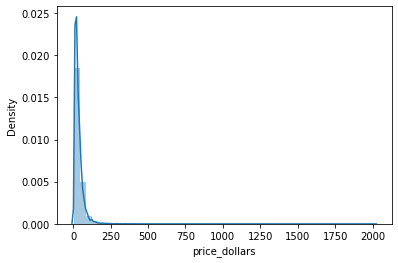

In [25]:
#check the spread of the price - normal distribution?
import seaborn as sns
sns.distplot(new2017_df['price_dollars'])

C:\Users\j9yor\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price_dollars', ylabel='Density'>

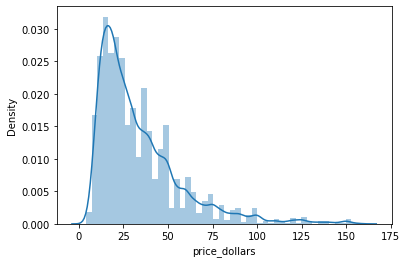

In [26]:
#Removing the top 1% of the observation will help us to deal with the outliers
q = new2017_df['price_dollars'].quantile(0.99)
new2017_df = new2017_df[new2017_df['price_dollars'] < q]

sns.distplot(new2017_df['price_dollars'])

In [27]:
#snapshot of updated dataframe
new2017_df.head()

,country,wine_type,price_dollars,ratings_desc
1,Spain,Tinta de Toro,110,1.0
2,US,Sauvignon Blanc,90,1.0
3,US,Pinot Noir,65,1.0
4,France,Provence red blend,66,1.0
5,Spain,Tinta de Toro,73,1.0


In [28]:
#updated stats without the top % -- notice the max has changed
new2017_df.describe()

,price_dollars,ratings_desc
count,59149.000000,59149.000000
mean,33.875197,0.355086
std,23.826935,0.478544
min,4.000000,0.000000
25%,17.000000,0.000000
50%,27.000000,0.000000
75%,44.000000,1.000000
max,159.000000,1.000000


In [29]:
# shows the counts by country to see spread
# US is roughly half of the dataset
new2017_df.groupby(['country']).count().sort_values(['wine_type'],ascending = False)

,wine_type,price_dollars,ratings_desc
country,,,
US,25141,25141,25141
Italy,8171,8171,8171
France,6466,6466,6466
Spain,4095,4095,4095
Chile,3006,3006,3006
Portugal,2345,2345,2345
Argentina,2329,2329,2329
Australia,2004,2004,2004
Austria,1340,1340,1340


### Final Dataframe for Machine learning
Choose to pass : (1) a single country -or- (2) all countries

In [30]:
# testing with single country
#machine_df = new2017_df[new2017_df.country == 'US']
#machine_df = new2017_df[new2017_df.country == 'Italy']
#machine_df = machine_df[['price_dollars','ratings_desc']]
#machine_df.head()

In [31]:
#testing with all countries
machine_df = new2017_df[['price_dollars','ratings_desc']]
machine_df.head()

,price_dollars,ratings_desc
1,110,1.0
2,90,1.0
3,65,1.0
4,66,1.0
5,73,1.0


In [32]:
# machine learning data frame count
machine_df.count()

price_dollars    59149
ratings_desc     59149
dtype: int64

In [33]:
# MACHINE LEARNING

# import dependencies 
# Scatter plot to check types (price / ratings)

# create new DF (x df / y df)

# separate data into 2 sets of data for training and for testing
# number of samples and features - shaping
# check the array [x:5]
# confirming data is right

# Create model with scikit-learn
# fit data into the model by convention, X is uppercase, y is lowercase
# create a best fit linear-regression line
# identify slopes for statistical purposes

In [34]:
#spending_bins = [0,29, 54, 79, 109, 180]
#group_names = ["<$29", "$29-$53", "$54-$78", "$79-$108", "$109-$180", ">$180"]

# LOGISTIC REGRESSION STEPS

## 1. Split the Data into Training and Testing

In [35]:
# Create our features
X = machine_df.drop('ratings_desc', axis =1 )

# Create our target
y = machine_df['ratings_desc']

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

## 2. Create a Logistic Regression Model

In [37]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

 ## 3. Fit (train) or model using the training data

In [38]:
# Train the data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

## 4. Make Predictions

In [39]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
22195,0.0,1.0
15775,0.0,1.0
34715,0.0,1.0
136985,0.0,0.0
21986,0.0,1.0
...,...,...
53182,1.0,1.0
9519,0.0,0.0
66493,1.0,1.0
26916,0.0,1.0


## 5. Validate the model using the test data

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.7366107654855288

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(predictions,y_test)
cm

array([[8585, 2943],
       [ 952, 2308]], dtype=int64)

In [42]:
# Format for easier understanding
cm_df = pd.DataFrame(cm)
cm_df.columns = ['Predicted good_wine','Predicted great_wine']
cm_df = cm_df.rename(index={0: 'Actual good_wine',1:'Actual great_wine'})
cm_df

,Predicted good_wine,Predicted great_wine
Actual good_wine,8585,2943
Actual great_wine,952,2308


In [43]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test,predictions))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.74      0.90      0.44      0.82      0.63      0.41      9537
        1.0       0.71      0.44      0.90      0.54      0.63      0.38      5251

avg / total       0.73      0.74      0.60      0.72      0.63      0.40     14788



In [44]:
#ASK: Does wine price predict a great wine rating?

# Connect to the AWS RDS instance and write DataFrame/CSV to PostgreSQL table.

In [45]:
import psycopg2
connection = psycopg2.connect(
    host = 'winedata.cn4begnutv3q.us-east-2.rds.amazonaws.com',
    port = 5432,
    user = 'postgres',
    password = 'password',
    database='MachineLearningProject'
    )
cursor=connection.cursor()

In [46]:
#creating table for database
cursor.execute(
"""
CREATE TABLE ML_DATA
(
COUNTRY VARCHAR(50),
WINE_TYPE VARCHAR(100),
PRICE_DOLLARS INT,
RATINGS_POINTS INT
)
"""
)
connection.commit()

In [47]:
#populate the table using the csv
with open('ML_data.csv', 'r') as row:
    next(row)# Skip the header row.
    cursor.copy_from(row, 'ML_DATA', sep=',')

connection.commit()    
